<a href="https://colab.research.google.com/github/salamisodikiolawale/AEJ/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How To Build Deep MultiLayer Perceptron Neural Network Models with Keras


## Method Used

The Keras Python library for deep learning focuses on the creation of models as a sequence of layers.

In this practical course you will discover how to create deep neural networks using keras.

## Import Libraries

In [1]:
import tensorflow as tf
from keras import layers
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils import np_utils
import pandas as pd
import numpy as np

## Generate Data

In [4]:
# Generation de plusieurs exemples d'invidus
nb_features = 50
dataL = make_blobs(n_samples=40000, n_features=nb_features, 
                           centers=5, cluster_std=10)
data = dataL[0]
classes = dataL[1]

## Visualize Data

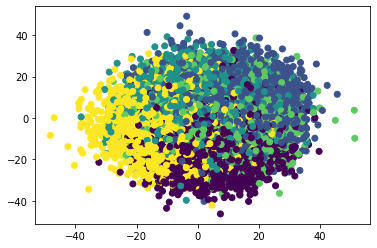

In [5]:
plt.scatter(data[:,0],data[:,1],c=classes)

In [7]:
# Data normalization
data = pd.DataFrame(data, columns = np.arange(nb_features))

scaler =  preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)

# transform the labels (transformation des éthiq en utilisant le one hot encodind)
labels = np_utils.to_categorical(classes)
print(labels)


#[0. 0. 0. 0. 1.] qui correspond a la class une


[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


# Split Data into train and test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42) #test_size proportion de donnée pour le test ici 20%
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(32000, 5)
(32000, 50)
(8000, 5)
(8000, 50)


## Creating the Model
** You will apply the different deep learning tools that allow to improve the results **
1. Built a deeep learning model with 4 hidden layers
2. Apply the early stopping function that allows to stop the training step when the test error starts increasing
3. Apply L1, then L2 regularization
4. Apply Dropout

In [14]:
# Import the early stopping library
from keras.callbacks import EarlyStopping

# Import the dropout library
from keras.layers import Dropout

# Import the library of regulizers
from keras import regularizers

#parameters
learning_rate = 0.01 #Le pas d'apprentissage
opt = 'SGD'
hidden1_drop = 0.3
hidden2_drop = 0.3
hidden3_drop = 0.3
input_drop = 0.2 #Couche 1, 2,3
lambda_l1 = 0.001
lambda_l2 = 0
size_batch= 250 # la taille de bacth
nb_epochs = 15 #Le nombre depoque maxi

# Create & train the Deep MLP model with 4 hidden layers  
model = Sequential()

# Add the first hidden layer
model.add(Dense(30, input_dim = nb_features, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))
#model.add(Activation('relu'))
#model.add(Dropout(input_drop))

# Add the second hidden layer
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(lambda_l1)))
#model.add(Dropout(hidden1_drop))

# Add the third hidden layer
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))
#model.add(Dropout(hidden2_drop))

# Add the fourth hidden layer
model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))
#model.add(Dropout(hidden3_drop))

# # Add the output layer
model.add(Dense(5, activation='softmax', kernel_regularizer=regularizers.l1(lambda_l1))) #Dense : elle est lignée au couche précedente et suivantes

# For a multi-class classification problem
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#  kernel_regularizer=regularizers.l2(0.01),
               # activity_regularizer=regularizers.l1(0.01))))

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 30)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = size_batch, epochs=nb_epochs, verbose=1, callbacks=[es])

#La curracy : l'inverse de l'erreur , le taux de bonne prédiction(val_acc)



Epoch 1/15
127/128 [============================>.] - ETA: 0s - loss: 2.0298 - accuracy: 0.2064

128/128 [==============================] - 1s 4ms/step - loss: 2.0292 - accuracy: 0.2069 - val_loss: 1.9673 - val_accuracy: 0.2995
Epoch 2/15
126/128 [============================>.] - ETA: 0s - loss: 1.9143 - accuracy: 0.3704

128/128 [==============================] - 0s 3ms/step - loss: 1.9129 - accuracy: 0.3715 - val_loss: 1.8394 - val_accuracy: 0.4446
Epoch 3/15
124/128 [============================>.] - ETA: 0s - loss: 1.7248 - accuracy: 0.4974

128/128 [==============================] - 0s 3ms/step - loss: 1.7209 - accuracy: 0.4989 - val_loss: 1.5715 - val_accuracy: 0.5666
Epoch 4/15
106/128 [=======================>......] - ETA: 0s - loss: 1.4542 - accuracy: 0.6079

128/128 [==============================] - 0s 2ms/step - loss: 1.4308 - accuracy: 0.6176 - val_loss: 1.2856 - val_accuracy: 0.6880
Epoch 5/15
105/128 [=======================>......] - ETA: 0s - loss: 1.1905 - accuracy: 0.7449

128/128 [==============================] - 0s 2ms/step - loss: 1.1685 - accuracy: 0.7594 - val_loss: 1.0357 - val_accuracy: 0.8420
Epoch 6/15
122/128 [===========================>..] - ETA: 0s - loss: 0.9197 - accuracy: 0.8861

128/128 [==============================] - 0s 3ms/step - loss: 0.9145 - accuracy: 0.8876 - val_loss: 0.7921 - val_accuracy: 0.9199
Epoch 7/15
102/128 [======================>.......] - ETA: 0s - loss: 0.7204 - accuracy: 0.9339

128/128 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.9360 - val_loss: 0.6359 - val_accuracy: 0.9452
Epoch 8/15
107/128 [========================>.....] - ETA: 0s - loss: 0.5990 - accuracy: 0.9543

128/128 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.9551 - val_loss: 0.5615 - val_accuracy: 0.9606
Epoch 9/15
124/128 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.9644

128/128 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.9643 - val_loss: 0.5236 - val_accuracy: 0.9664
Epoch 10/15
105/128 [=======================>......] - ETA: 0s - loss: 0.5124 - accuracy: 0.9698

128/128 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.9706 - val_loss: 0.5006 - val_accuracy: 0.9730
Epoch 11/15
106/128 [=======================>......] - ETA: 0s - loss: 0.4922 - accuracy: 0.9748

128/128 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.9746 - val_loss: 0.4852 - val_accuracy: 0.9756
Epoch 12/15
127/128 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.9773

128/128 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.9772 - val_loss: 0.4736 - val_accuracy: 0.9787
Epoch 13/15
125/128 [============================>.] - ETA: 0s - loss: 0.4688 - accuracy: 0.9794

128/128 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.9795 - val_loss: 0.4646 - val_accuracy: 0.9800
Epoch 14/15
113/128 [=========================>....] - ETA: 0s - loss: 0.4610 - accuracy: 0.9806

128/128 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.9812 - val_loss: 0.4570 - val_accuracy: 0.9824
Epoch 15/15
124/128 [============================>.] - ETA: 0s - loss: 0.4532 - accuracy: 0.9825

128/128 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.9827 - val_loss: 0.4506 - val_accuracy: 0.9829


In [15]:
score = model.evaluate(x_test, y_test, batch_size=size_batch, verbose=1)
print("Scores on test set: loss=%s accuracy=%s" % tuple(score))

32/32 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.9829
Scores on test set: loss=0.45055773854255676 accuracy=0.9828749895095825


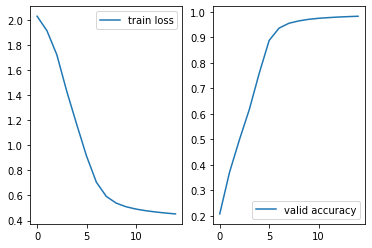

In [17]:
plt.figure(1)

plt.subplot(1,2,1)
out = np.asarray(history.history['loss'])
plt.plot(out, label='train loss')
plt.legend()

plt.subplot(1,2,2)
out = np.asarray(history.history['accuracy'])
plt.plot(out, label='valid accuracy')
plt.legend()

plt.show()

#NB : Il faut arriv a un niveau de stabilisation de la fonction de cout jet de la fonction de l'erreur

6. Compute the cross validation error
7. Apply cross validation

In [18]:
# Import Cross validation library
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline

x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size=0.2, random_state=42) 

def create_MLP_model():
    # Create & train the Deep MLP model with 4 hidden layers  
    model = Sequential()

    # Add the first hidden layer
    model.add(Dense(30, input_dim = nb_features, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))

    # Add the second hidden layer
    model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))

    # Add the third hidden layer
    model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))

    # Add the fourth hidden layer
    model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l1(lambda_l1)))

    # Add the output layer
    model.add(Dense(5, activation='softmax', kernel_regularizer=regularizers.l1(lambda_l1)))

    # For a multi-class classification problem
    model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', preprocessing.StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_MLP_model, epochs=nb_epochs, batch_size=size_batch, verbose=0)))
pipeline = Pipeline(estimators)

kfold = StratifiedKFold(n_splits=10, shuffle=True)
print(x_train.shape)
print(y_train.shape)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


(32000, 50)
(32000,)
Hidden: 98.26% (0.20%)
